In [1]:
import pandas as pd

In [2]:
from rugby import *

/home/daniel/repositories/rugby-data/notebooks/rugby/__init__.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  and (score.type is not "conversion")
/home/daniel/repositories/rugby-data/notebooks/rugby/__init__.py:81: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (score.type is "conversion")
/home/daniel/repositories/rugby-data/notebooks/rugby/__init__.py:96: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  and (score.type is not "conversion")


In [3]:
data = pd.read_json("../json/United Rugby Championship-2021-2022.json")

In [5]:
pro14 = Tournament("URC", "2021-2022", data)

[69, 0] [80]
[67, 0] [80]


In [30]:
pro14.teams()

[Ulster,
 Scarlets,
 Munster,
 Ospreys,
 Cardiff Blues,
 Dragons,
 Leinster,
 Edinburgh,
 Glasgow,
 Zebre,
 Benetton,
 Sharks,
 Lions,
 Stormers,
 Connacht,
 Blue Bulls]

In [31]:
team = pro14.teams()[8]

In [36]:
team.squad(pro14)[2].total_on_field_points(pro14)

35

In [46]:
team = pro14.teams()[8]
players = team.squad(pro14)
print(team.name)
row_head = "{:25} {:5} {:5} {:5}\t{:5} {:5}"
row = "{:25} {:5} {:5} {:5}\t{:4.3f} {:4.3f}"
print(row_head.format("Player", "Points", "Conc", "Time", "srate", "crate" ))
print("-"*(10+len(row_head.format("Player", "Points", "Conc", "Time", 0,1 ))))
for player in players:
    if player.total_play_time(pro14) == 0: continue
    print(row.format(player.name, player.total_on_field_points(pro14), player.total_on_conceeded_points(pro14), player.total_play_time(pro14), 
                     player.total_on_field_points(pro14) / player.total_play_time(pro14),
                    player.total_on_conceeded_points(pro14) / player.total_play_time(pro14)))

Glasgow
Player                    Points Conc  Time 	srate crate
------------------------------------------------------------------
Miotti                       48    15   128	0.375 0.117
Matt Fagerson                64    37   201	0.318 0.184
Enrique Pieretto             35    39   187	0.187 0.209
George Turner                85   101   387	0.220 0.261
Gregor Brown                  5     7    21	0.238 0.333
Peter Horne                   0     0     4	0.000 0.000
Simon Berghan                90    76   356	0.253 0.213
Lewis Bean                   43    38   186	0.231 0.204
Robbie Fergusson             37    23   125	0.296 0.184
Walter Fifita                27    10    95	0.284 0.105
Robert Harley               136   139   559	0.243 0.249
Josh McKay                  165   192   630	0.262 0.305
Nick Grigg                   42    22   175	0.240 0.126
Cole Forbes                 309   266  1015	0.304 0.262
Ryan Wilson                 353   285  1196	0.295 0.238
Stafford McDowall           

In [48]:
total_times = {player.name: player.total_play_time(pro14) for player in pro14.players()}

In [59]:
all_attack = {player.name: player.total_on_field_points(pro14)/player.total_play_time(pro14) for player in pro14.players() if player.total_play_time(pro14)>50}

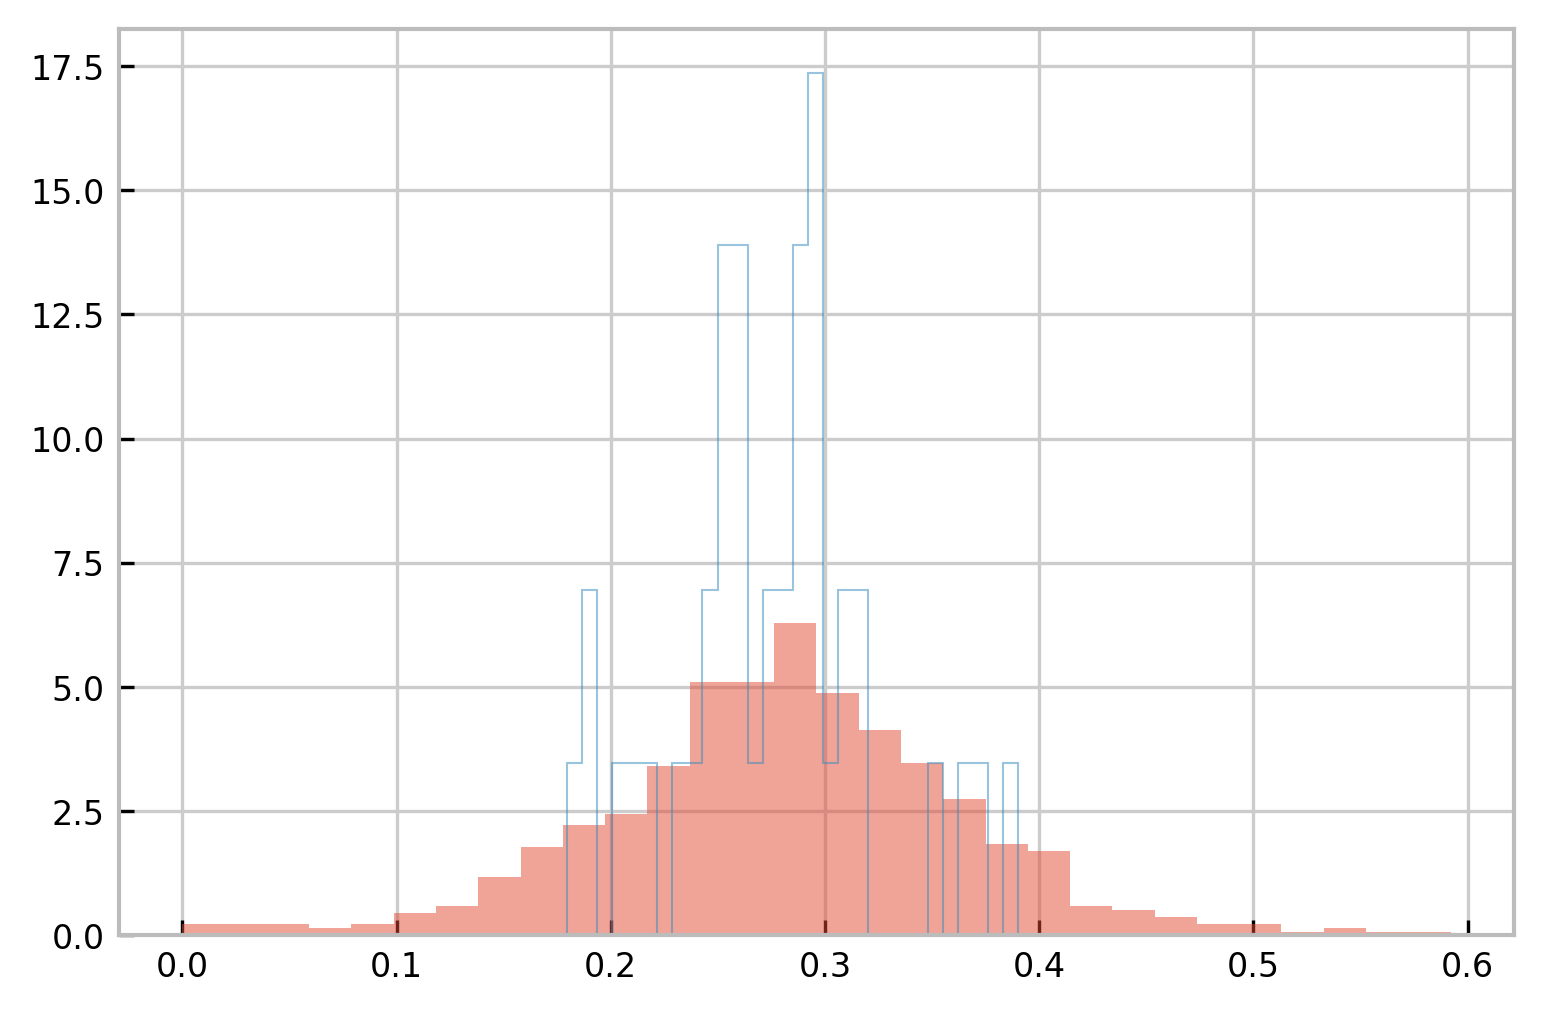

In [82]:
f, ax = plt.subplots(1,1, dpi=300)

all_attack = {player.name: player.total_on_field_points(pro14)/player.total_play_time(pro14) for player in pro14.players() if player.total_play_time(pro14)>50}
ax.hist(all_attack.values(), bins=30, density=True, alpha=0.5);

team = pro14.teams()[8]
players = team.squad(pro14)
glasgow_attack = {player.name: player.total_on_field_points(pro14)/player.total_play_time(pro14) for player in players if player.total_play_time(pro14)>50}
ax.hist(glasgow_attack.values(), bins=30, density=True, alpha=0.5, histtype='step');

In [49]:
total_Scores = {player.name: player.total_on_field_points(pro14) for player in pro14.players()}

In [50]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Relative frequency')

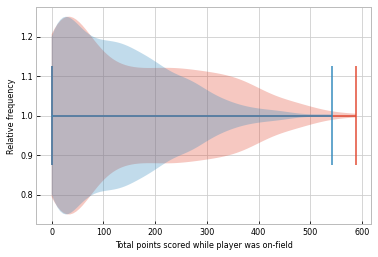

In [51]:
total_Scores = {player.name: player.total_on_field_points(premiership) for player in premiership.players()}
plt.violinplot(total_Scores.values(), vert=False);
total_Scores = {player.name: player.total_on_field_points(pro14) for player in pro14.players()}
plt.violinplot(total_Scores.values(), vert=False);
plt.xlabel("Total points scored while player was on-field")
plt.ylabel("Relative frequency")

Text(0, 0.5, 'Relative frequency')

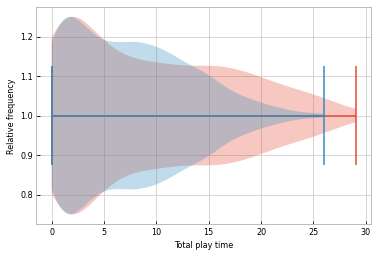

In [21]:
import numpy as np
total_times = {player.name: player.total_play_time(premiership) for player in premiership.players()}
plt.violinplot(np.array(list(total_times.values()))/60, vert=False);
total_times = {player.name: player.total_play_time(pro14) for player in pro14.players()}
plt.violinplot(np.array(list(total_times.values()))/60, vert=False);
plt.xlabel("Total play time")
plt.ylabel("Relative frequency")

#plt.annotate("Stuart Hogg", xy=(total_times['Stuart Hogg']/60, 1.1), rotation=45)
#plt.annotate("George Horne", xy=(total_times['George Horne']/60, 1.1), rotation=45)
#plt.annotate("Rob Harley", xy=(total_times['Robert Harley']/60, 1.1), rotation=45)

In [76]:
positions = [position.position for position in players[20].positions(pro14)]

In [77]:
positions

[10, 22, 10, 10, 22, 22, 10, 22, 22, 10, 22, 22, 10, 10, 15, 10, 10]

In [23]:
players[2].positions(premiership)[1].playing

[range(0, 54)]

In [24]:
hornes = [x for x in players if ("Horne" in x.name)]
for player in players:
    total_score = sum([score.value for score in player.scores(pro14)])
    print(player, total_score)

Ross Batty 0
Matt Garvey 0
Cooper Vuna 0
Zach Mercer 0
Joe Cokanasiga 0
Anthony Watson 0
Max Green 0
Toby Faletau 0
Tom Ellis 0
Tom Homer 0
Charlie Ewels 0
Sam Nixon 0
Josh Bayliss 0
Rhys Priestland 68
Tom Dunn 0
Darren Atkins 0
Lucas Noguera Paz 0
Nathan Catt 0
Miles Reid 0
Aled Brew 0
Max Wright 0
Jacques van Rooyen 0
Jackson Willison 0
Michael Van Vuuren 0
Paul Grant 0
Jamie Roberts 0
Chris Cook 0
Luke Charteris 0
Henry Thomas 0
Elliot Stooke 0
Semesa Rokoduguni 0
Freddie Burns 0
Jack Wilson 0
Anthony Perenise 0
James Wilson 0
Will Chudley 0
Dave Attwood 0
Victor Delmas 0
Alex Davies 0
Kahn Fotuali'i 0
Beno Obano 0
Levi Douglas 0
Will Vaughan 0
Jonathan Joseph 0
Sam Underhill 0
Ruaridh McConnochie 0
Max Lahiff 0
Jack Walker 0
Max Clark 0
Jack Davies 0
F Louw 0


In [25]:
players[0].positions(pro14)[0].on_times

IndexError: list index out of range

In [ ]:
players[0].positions(pro14)[3].off_times

In [ ]:
if len(players[0].positions(pro14)[0].off_times)

In [ ]:
for position in players[0].positions(pro14):
    if len(position.on_times) > 0:
        if len(position.off_times) == 0:
            position.off_times.append(80)
    for i, on_times in enumerate(position.on_times):
        position.playing = range(position.on_times[i], position.off_times[i])

In [ ]:
players[0].positions(pro14)[0].playing